1) load data set (pandas)

1) Label Encoding (pandas)

2) shufle dataset (pandas)

3) split training (70) validation (10) and test (20) %

4) Split inputs and labels (output)

5) label one hot coding

6) fit model without validation (compare training and testing acuracies)

7) fit model wit validation (with history)

8) create graph

9) Introduce k-fold, as data is limited

10) tune nework accuracy by ephoc numbers, change of optimizer,

bath size, hidden layers, number of nueron,

(chapter 3: Listing Listing 3.9, 3:11, 3:17, 3:18 3:19, 3:20)

from tensorflow.keras.utils import to_categorical

from sklearn import preprocessing as pp

pp.labelEncoder()

sonar_df.iloc(:,60] = pp.labelEncoder.fit_transform(sonar_df.iloc(:,60])

df_train=sonar_df.iloc[:144,:59]

df_train_label = sonar_df.iloc[:144, 59]

train_data = df_train.to_numpy()

train_labels = df_train_label.to_numpy()

one_hot_trrain_labels = to_categorical(train_labels)

#short cut

train_data = sonar_df.iloc[:144,:59].values

df.sample(frac=1)

The frac keyword argument specifies the fraction of rows to return in the random sample,

so frac=1 means return all rows (in random order).

# 1) load data set (pandas)

1) Label Encoding (pandas)

In [1]:
#1
import numpy as np
import pandas as pd
#3
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
#6
import matplotlib.pyplot as plt
#9
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
# load dataset
dataframe = pd.read_csv("dataset/sonar.csv", header=None)
dataset = dataframe.values
dataset

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [3]:
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [4]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [5]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)

LabelEncoder()

# 2) shufle dataset (pandas)
# 3) split training (70) validation (10) and test (20) %
# 4) Split inputs and labels (output)

In [7]:
seed = 7
np.random.seed(seed)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.20,
                                                 random_state=seed)

In [9]:
X_train

array([[0.0025, 0.0309, 0.0171, ..., 0.0016, 0.0028, 0.0014],
       [0.0392, 0.0108, 0.0267, ..., 0.0044, 0.0022, 0.0014],
       [0.0067, 0.0096, 0.0024, ..., 0.0034, 0.0051, 0.0031],
       ...,
       [0.0201, 0.0026, 0.0138, ..., 0.0024, 0.0057, 0.0044],
       [0.005 , 0.0017, 0.027 , ..., 0.0063, 0.0017, 0.0028],
       [0.0294, 0.0123, 0.0117, ..., 0.0006, 0.0081, 0.0043]])

In [10]:
y_train

array(['R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'M',
       'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M',
       'R', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R',
       'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R',
       'R', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'R',
       'M', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'R',
       'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R',
       'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R',
       'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M'], dtype=object)

# 5) label one hot coding

In [11]:
y_train = encoder.transform(y_train)
reverse_encoding_train = encoder.inverse_transform(y_train) # reversing the encoding for fun
y_test = encoder.transform(y_test)
reverse_encoding_test = encoder.inverse_transform(y_test) # reversing the encoding for fun

In [12]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

# 6) fit model without validation (compare training and testing acuracies)

In [87]:
 # create model, write code below
model = Sequential()
# model.add(Dense(60, activation ='relu', input_shape = (X_train.shape[1],))) # number of features (60) are used as vector in input shape
# model.add(Dense(1, activation ='sigmoid'))
#model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
#model.add(Dense(30, activation ='relu'))
model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.summary()

Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_293 (Dense)            (None, 90)                5490      
_________________________________________________________________
dense_294 (Dense)            (None, 32)                2912      
_________________________________________________________________
dense_295 (Dense)            (None, 1)                 33        
Total params: 8,435
Trainable params: 8,435
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Compile model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [89]:
num_epochs = 50

In [90]:
train = model.fit(X_train, y_train, epochs = num_epochs, batch_size = 32, verbose = 2)

Epoch 1/50
166/166 - 3s - loss: 0.6925 - acc: 0.5181
Epoch 2/50
166/166 - 0s - loss: 0.6543 - acc: 0.6566
Epoch 3/50
166/166 - 0s - loss: 0.6353 - acc: 0.6566
Epoch 4/50
166/166 - 0s - loss: 0.6088 - acc: 0.7349
Epoch 5/50
166/166 - 0s - loss: 0.6056 - acc: 0.7108
Epoch 6/50
166/166 - 0s - loss: 0.5845 - acc: 0.7410
Epoch 7/50
166/166 - 0s - loss: 0.5711 - acc: 0.7590
Epoch 8/50
166/166 - 0s - loss: 0.5563 - acc: 0.7590
Epoch 9/50
166/166 - 0s - loss: 0.5545 - acc: 0.7771
Epoch 10/50
166/166 - 0s - loss: 0.5370 - acc: 0.8012
Epoch 11/50
166/166 - 0s - loss: 0.5226 - acc: 0.7831
Epoch 12/50
166/166 - 0s - loss: 0.5171 - acc: 0.7590
Epoch 13/50
166/166 - 0s - loss: 0.4997 - acc: 0.8133
Epoch 14/50
166/166 - 0s - loss: 0.4984 - acc: 0.8193
Epoch 15/50
166/166 - 0s - loss: 0.4830 - acc: 0.8072
Epoch 16/50
166/166 - 0s - loss: 0.4807 - acc: 0.7892
Epoch 17/50
166/166 - 0s - loss: 0.4684 - acc: 0.8133
Epoch 18/50
166/166 - 0s - loss: 0.4569 - acc: 0.8554
Epoch 19/50
166/166 - 0s - loss: 0.44

In [91]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

42/42 - 3s - loss: 0.3756 - acc: 0.8571


[0.3755775732653482, 0.85714287]

In [92]:
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))
#You can run the code again to see how the model perform

acc : 85.71%
loss : 37.56%


In [93]:
# # summarize history for accuracy
# plt.plot(train.history['acc'])
# plt.plot(train.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# 7) fit model wit validation (with history)

In [94]:
history= model.fit(X_train, y_train, epochs = num_epochs, batch_size=32, validation_split=.10, verbose = 2)

Train on 149 samples, validate on 17 samples
Epoch 1/50
149/149 - 0s - loss: 0.3153 - acc: 0.8859 - val_loss: 0.1631 - val_acc: 1.0000
Epoch 2/50
149/149 - 0s - loss: 0.2955 - acc: 0.8993 - val_loss: 0.1623 - val_acc: 1.0000
Epoch 3/50
149/149 - 0s - loss: 0.2984 - acc: 0.8993 - val_loss: 0.1593 - val_acc: 1.0000
Epoch 4/50
149/149 - 0s - loss: 0.2920 - acc: 0.8993 - val_loss: 0.1922 - val_acc: 0.8824
Epoch 5/50
149/149 - 0s - loss: 0.3167 - acc: 0.8859 - val_loss: 0.1923 - val_acc: 0.8824
Epoch 6/50
149/149 - 0s - loss: 0.2847 - acc: 0.8725 - val_loss: 0.2023 - val_acc: 0.8824
Epoch 7/50
149/149 - 0s - loss: 0.2939 - acc: 0.8926 - val_loss: 0.1663 - val_acc: 0.9412
Epoch 8/50
149/149 - 0s - loss: 0.2832 - acc: 0.8792 - val_loss: 0.1618 - val_acc: 1.0000
Epoch 9/50
149/149 - 0s - loss: 0.2865 - acc: 0.8859 - val_loss: 0.1697 - val_acc: 0.9412
Epoch 10/50
149/149 - 0s - loss: 0.2748 - acc: 0.9262 - val_loss: 0.1516 - val_acc: 1.0000
Epoch 11/50
149/149 - 0s - loss: 0.2685 - acc: 0.9060 

In [95]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

42/42 - 0s - loss: 0.3773 - acc: 0.8333


[0.37733837252571467, 0.8333333]

In [96]:
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))
#You can run the code again to see how the model perform

acc : 83.33%
loss : 37.73%


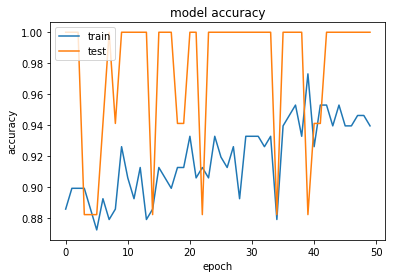

In [97]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 9) Introduce k-fold, as data is limited

In [82]:
def create_baseline():
  # create model, write code below
  model = Sequential()
  #model.add(Dense(60, activation ='relu', input_shape = (X_train.shape[1],))) # number of features (60) are used as vector in input shape
  #model.add(Dense(1, activation ='sigmoid'))
  model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
  #model.add(Dense(30, activation ='relu', input_shape = (X_train.shape[1],)))

  model.add(Dense(32, activation ='relu'))
  model.add(Dense(1, activation ='sigmoid'))
  # Compile model, write code below
  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model
 

In [83]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=25, batch_size=32, verbose=2)
kfold = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/25
160/160 - 5s - loss: 0.7414 - acc: 0.3812
Epoch 2/25
160/160 - 0s - loss: 0.7095 - acc: 0.5063
Epoch 3/25
160/160 - 0s - loss: 0.6937 - acc: 0.5125
Epoch 4/25
160/160 - 0s - loss: 0.6812 - acc: 0.6125
Epoch 5/25
160/160 - 0s - loss: 0.6674 - acc: 0.6687
Epoch 6/25
160/160 - 0s - loss: 0.6521 - acc: 0.6750
Epoch 7/25
160/160 - 0s - loss: 0.6367 - acc: 0.6812
Epoch 8/25
160/160 - 0s - loss: 0.6164 - acc: 0.6875
Epoch 9/25
160/160 - 0s - loss: 0.6027 - acc: 0.7937
Epoch 10/25
160/160 - 0s - loss: 0.5844 - acc: 0.7750
Epoch 11/25
160/160 - 0s - loss: 0.5683 - acc: 0.7312
Epoch 12/25
160/160 - 0s - loss: 0.5507 - acc: 0.8313
Epoch 13/25
160/160 - 0s - loss: 0.5346 - acc: 0.8188
Epoch 14/25
160/160 - 0s - loss: 0.5210 - acc: 0.8250
Epoch 15/25
160/160 - 0s - loss: 0.5105 - acc: 0.8000
Epoch 16/25
160/160 - 0s - loss: 0.4917 - acc: 0.8188
Epoch 17/25
160/160 - 0s - loss: 0.4782 - acc: 0.8250
Epoch 18/25
160/160 - 0s - loss: 0.4626 - acc: 0.8375
Epoch 19/25
160/160 - 0s - loss: 0.45

KeyboardInterrupt: 